In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')
import cufflinks as cf
cf.go_offline()

In [ ]:
pip install cufflinks

In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
dataset = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

In [ ]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [ ]:
dataset['MEDV'] = boston_dataset.target

In [ ]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


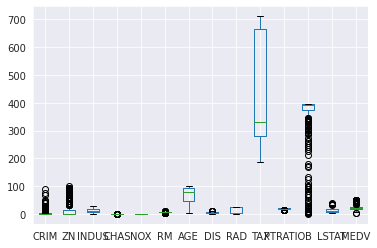

In [ ]:
boxx= dataset.boxplot(['CRIM',	'ZN',	'INDUS',	'CHAS','NOX','RM',	'AGE',	'DIS','RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT','MEDV'])

In [ ]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_transform=sc.fit_transform(dataset)
x=x_transform

In [ ]:
x

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833, -1.15724782]])

In [ ]:
x=dataset.drop('MEDV',1)
y=dataset['MEDV']

In [ ]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.3)

In [ ]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
463,5.82115,0.0,18.10,0.0,0.7130,6.513,89.9,2.8016,24.0,666.0,20.2,393.82,10.29
75,0.09512,0.0,12.83,0.0,0.4370,6.286,45.0,4.5026,5.0,398.0,18.7,383.23,8.94
478,10.23300,0.0,18.10,0.0,0.6140,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03
199,0.03150,95.0,1.47,0.0,0.4030,6.975,15.3,7.6534,3.0,402.0,17.0,396.90,4.56
84,0.05059,0.0,4.49,0.0,0.4490,6.389,48.0,4.7794,3.0,247.0,18.5,396.90,9.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,0.02543,55.0,3.78,0.0,0.4840,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18
359,4.26131,0.0,18.10,0.0,0.7700,6.112,81.3,2.5091,24.0,666.0,20.2,390.74,12.67
323,0.28392,0.0,7.38,0.0,0.4930,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
280,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76


In [ ]:
y_train

463    20.2
75     21.4
478    14.6
199    34.9
84     23.9
       ... 
343    23.9
359    22.6
323    18.5
280    45.4
8      16.5
Name: MEDV, Length: 354, dtype: float64

In [ ]:
y_train 

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
y_test

198    34.6
229    31.5
502    20.6
31     14.5
315    16.2
       ... 
272    24.4
124    18.8
178    29.9
447    12.6
282    46.0
Name: MEDV, Length: 152, dtype: float64

In [ ]:
df= dataset

In [ ]:
q_low = x_train["B"].quantile(0.01)
q_hi  = x_train["B"].quantile(0.99)

df_filtered = x_train[(df["B"] < q_hi) & (x_train["B"] > q_low)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
df_filtered

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
463,5.82115,0.0,18.10,0.0,0.7130,6.513,89.9,2.8016,24.0,666.0,20.2,393.82,10.29
75,0.09512,0.0,12.83,0.0,0.4370,6.286,45.0,4.5026,5.0,398.0,18.7,383.23,8.94
478,10.23300,0.0,18.10,0.0,0.6140,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03
391,5.29305,0.0,18.10,0.0,0.7000,6.051,82.5,2.1678,24.0,666.0,20.2,378.38,18.76
126,0.38735,0.0,25.65,0.0,0.5810,5.613,95.6,1.7572,2.0,188.0,19.1,359.29,27.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.08387,0.0,12.83,0.0,0.4370,5.874,36.6,4.5026,5.0,398.0,18.7,396.06,9.10
359,4.26131,0.0,18.10,0.0,0.7700,6.112,81.3,2.5091,24.0,666.0,20.2,390.74,12.67
323,0.28392,0.0,7.38,0.0,0.4930,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
280,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76


In [ ]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
d_transform=sc.fit_transform(df_filtered)
d=d_transform

In [ ]:
d

array([[ 0.34213967, -0.4923601 ,  1.04392766, ...,  0.82266968,
         0.47563168, -0.28486737],
       [-0.38103159, -0.4923601 ,  0.26862349, ...,  0.14550384,
         0.36105101, -0.48146668],
       [ 0.89933605, -0.4923601 ,  1.04392766, ...,  0.82266968,
         0.32285746,  0.84230204],
       ...,
       [-0.35718702, -0.4923601 , -0.53316166, ...,  0.55180334,
         0.44652667, -0.07370514],
       [-0.38852596,  0.38640171, -1.12898365, ..., -1.56998295,
         0.40519541, -1.23582554],
       [-0.36636617,  0.05686603, -0.46107456, ..., -1.43454978,
         0.39783801,  2.57528861]])

In [ ]:
q_low = x_test["B"].quantile(0.01)
q_hi  = x_test["B"].quantile(0.99)

df1_filtered = x_test[(x_test["B"] < q_hi) & (x_test["B"] > q_low)]

In [ ]:
df1_filtered.tail()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
272,0.11460,20.0,6.96,0.0,0.4640,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
124,0.09849,0.0,25.65,0.0,0.5810,5.879,95.8,2.0063,2.0,188.0,19.1,379.38,17.58
178,0.06642,0.0,4.05,0.0,0.5100,6.860,74.4,2.9153,5.0,296.0,16.6,391.27,6.92
447,9.92485,0.0,18.10,0.0,0.7400,6.251,96.6,2.1980,24.0,666.0,20.2,388.52,16.44
282,0.06129,20.0,3.33,1.0,0.4429,7.645,49.7,5.2119,5.0,216.0,14.9,377.07,3.01


In [ ]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
p_transform=sc.fit_transform(df1_filtered)
p=p_transform

In [ ]:
p

array([[-0.50995702,  2.8015794 , -1.40028788, ..., -2.37792048,
         0.47162113, -0.92175273],
       [-0.45065863, -0.47114112, -0.75756457, ..., -0.35035192,
         0.34368095, -1.35106809],
       [-0.3166921 , -0.47114112, -0.49113653, ...,  1.1703245 ,
         0.30473794,  0.04195519],
       ...,
       [-0.50573966, -0.47114112, -1.05283276, ..., -0.68828001,
         0.46158872, -0.87671965],
       [ 0.94090489, -0.47114112,  0.87671051, ...,  0.83239641,
         0.431923  ,  0.5523301 ],
       [-0.50649245,  0.34703901, -1.15171327, ..., -1.40637721,
         0.3084057 , -1.46365079]])

The slowest run took 31.87 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 1.27 ms per loop


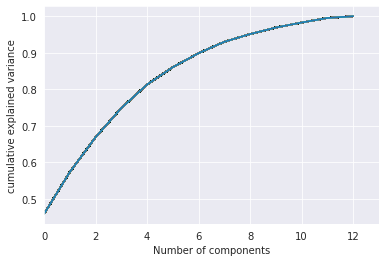

In [ ]:
%%timeit
from sklearn.decomposition import PCA

pca = PCA().fit(d)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,13,1)
plt.xlabel('Number of components')
plt.ylabel('cumulative explained variance')
plt.ylabel('cumulative explained variance')

Text(0, 0.5, 'cumulative explained variance')

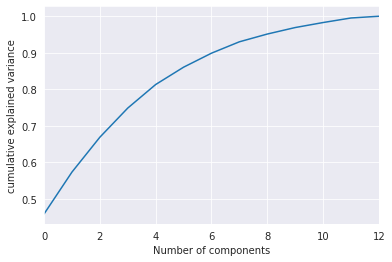

In [ ]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=13)
df5=pca2.fit_transform(d)

plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlim(0,12,1)
plt.xlabel('Number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
explained_variance = pca2.explained_variance_ratio_
explained_variance

array([0.45909814, 0.11457856, 0.09536295, 0.07974636, 0.06439669,
       0.0474103 , 0.03832752, 0.03114763, 0.02121742, 0.01778407,
       0.01370533, 0.01246848, 0.00475655])

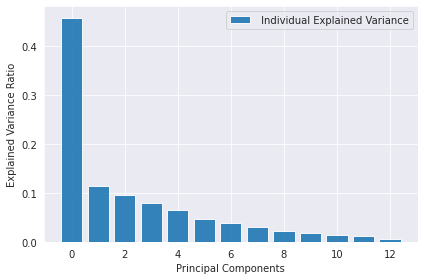

In [ ]:
explained_variance=pca2.explained_variance_ratio_
plt.figure(figsize=(6,4))
plt.bar(range(13),explained_variance,alpha=0.9,align='center',label=' Individual Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()

The slowest run took 16.07 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 1.23 ms per loop


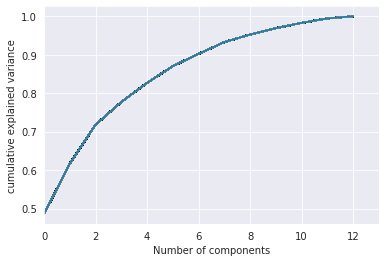

In [ ]:
%%timeit
from sklearn.decomposition import PCA

pca = PCA().fit(p)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,13,1)
plt.xlabel('Number of components')
plt.ylabel('cumulative explained variance')
plt.ylabel('cumulative explained variance')

Text(0, 0.5, 'cumulative explained variance')

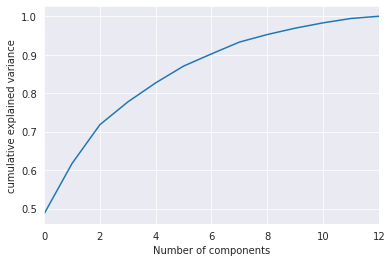

In [ ]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=13)
df5=pca2.fit_transform(p)

plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlim(0,12,1)
plt.xlabel('Number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
explained_variance = pca2.explained_variance_ratio_
explained_variance

array([0.48591468, 0.13089243, 0.10106689, 0.05917741, 0.04967078,
       0.04359131, 0.03183735, 0.03060612, 0.01967209, 0.01654617,
       0.01385064, 0.01138065, 0.00579349])

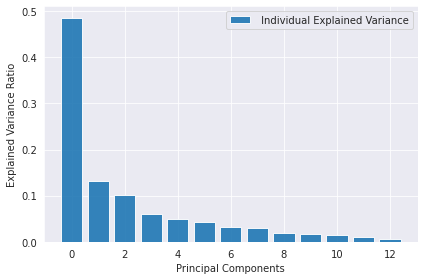

In [ ]:
explained_variance=pca2.explained_variance_ratio_
plt.figure(figsize=(6,4))
plt.bar(range(13),explained_variance,alpha=0.9,align='center',label=' Individual Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
data= d
arr = np.array(data)

df1 = pd.DataFrame(data=arr.flatten())

print(df1)

             0
0     0.342140
1    -0.492360
2     1.043928
3    -0.304034
4     1.352997
...        ...
3375 -0.524383
3376 -0.579384
3377 -1.434550
3378  0.397838
3379  2.575289

[3380 rows x 1 columns]


In [ ]:
y_train = np.array(y_train)

In [ ]:
d.shape

(260, 13)

In [ ]:
y_train.shape

(354,)

In [ ]:
y_train= np.arange(1,261)

In [ ]:
y_train.shape

(260,)

In [ ]:
#linear regression
import statsmodels.api as sm
x_train_constant=sm.add_constant(d)
model1=sm.OLS(y_train,x_train_constant)
lr1=model1.fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.312
Date:                Fri, 12 Feb 2021   Prob (F-statistic):              0.206
Time:                        17:35:57   Log-Likelihood:                -1482.9
No. Observations:                 260   AIC:                             2994.
Df Residuals:                     246   BIC:                             3044.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        130.5000      4.628     28.200      0.0

In [ ]:
#linear regression
import statsmodels.api as sm
x_train_constant=sm.add_constant(x_train)
model1=sm.OLS(y_train,x_train_constant)
lr1=model1.fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     79.69
Date:                Fri, 12 Feb 2021   Prob (F-statistic):           9.36e-95
Time:                        18:37:33   Log-Likelihood:                -1024.1
No. Observations:                 354   AIC:                             2076.
Df Residuals:                     340   BIC:                             2130.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.1158      5.641      5.871      0.0

In [ ]:
df5= pd.DataFrame(data= x_train)

In [ ]:
df5

,0
0,13
1,14
2,15
3,16
4,17
...,...
337,350
338,351
339,352
340,353


In [ ]:
df4

,MEDV
0,1
1,2
2,3
3,4
4,5
...,...
255,256
256,257
257,258
258,259


In [ ]:
x_train.shape

(354, 13)

In [ ]:
df4.shape

(260, 1)

In [ ]:
x_train= np.arange(13,355)

In [ ]:
x_train.shape

(342,)

In [ ]:
from pandas import DataFrame

In [ ]:
pe= DataFrame(pca2.explained_variance_.round(2), index=['p'+ str(i) for i in range(1,14)], columns=['Explained Variance']).T
per= DataFrame(pca2.explained_variance_ratio_.round(2), index=['p'+ str(i) for i in range(1,14)], columns=['Explained Variance']).T

In [ ]:
pe

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13
Explained Variance,6.37,1.72,1.33,0.78,0.65,0.57,0.42,0.4,0.26,0.22,0.18,0.15,0.08


In [ ]:
per

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13
Explained Variance,0.49,0.13,0.1,0.06,0.05,0.04,0.03,0.03,0.02,0.02,0.01,0.01,0.01


Text(0, 0.5, 'cumulative explained variance')

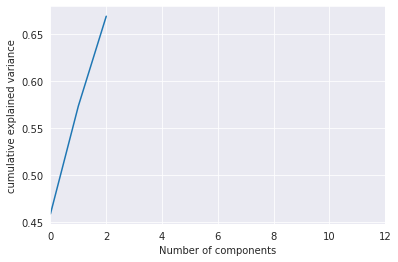

In [ ]:
from sklearn.decomposition import PCA
pca4 = PCA(n_components=3)
df7=pca4.fit_transform(d)

plt.plot(np.cumsum(pca4.explained_variance_ratio_))
plt.xlim(0,12,1)
plt.xlabel('Number of components')
plt.ylabel('cumulative explained variance')

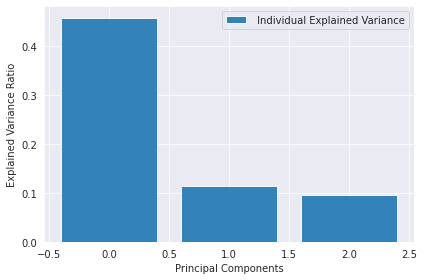

In [ ]:
explained_variance=pca4.explained_variance_ratio_
plt.figure(figsize=(6,4))
plt.bar(range(3),explained_variance,alpha=0.9,align='center',label=' Individual Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
pe1= DataFrame(pca4.explained_variance_.round(2), index=['p'+ str(i) for i in range(1,4)], columns=['Explained Variance']).T

In [ ]:
pe1

,p1,p2,p3
Explained Variance,5.99,1.5,1.24


In [ ]:
pe.shape

(1, 13)

In [ ]:
y_train1= np.array(y_train)

In [ ]:
pe2.shape

(1, 3)

In [ ]:
y_train.shape

(354,)

In [ ]:
y_train.arange(1,3)

AttributeError: ignored

<Figure size 432x288 with 0 Axes>

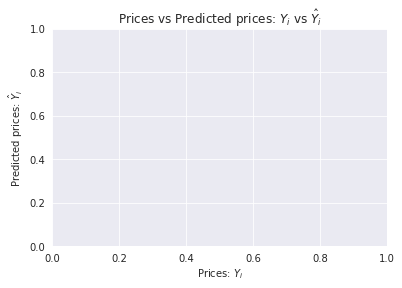

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)
plt.scatter = (y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show
plt.figure()

In [ ]:
d.shape

(260, 13)

In [ ]:
xyz=y_train.values.reshape(-1,1)

In [ ]:
xyz.shape

(354, 1)